Descripción

Nota: Hecho en colab
# MLP Básica (Core)
 Descripción:
En esta actividad, implementarás una red neuronal de perceptrón multicapa (MLP) básica utilizando el dataset «Breast Cancer Wisconsin (Diagnostic)» disponible en Kaggle. Este dataset es adecuado para la clasificación binaria, donde la red MLP predecirá si un tumor es benigno o maligno basado en una serie de características.

Enlace al dataset: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

Objetivo:

El objetivo de la actividad es implementar una red MLP básica con una capa oculta, entrenarla en el dataset de cáncer de mama y evaluar su rendimiento en términos de precisión y otras métricas de clasificación.

Instrucciones:

1. Carga de datos:
  - Descarga y carga el dataset desde Kaggle. Observa las características disponibles, que incluyen variables como el radio del núcleo del tumor, la textura, la suavidad, entre otras.
  - Asegúrate de verificar si hay valores nulos y manejar cualquier valor atípico que pudiera estar presente.

In [1]:
# Instalar y configurar Kaggle
#!pip install kaggle
#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json

# Descargar y descomprimir el dataset
#!kaggle datasets download -d uciml/breast-cancer-wisconsin-data
#!unzip breast-cancer-wisconsin-data.zip

# Importar Pandas y cargar el dataset
import pandas as pd

df = pd.read_csv('data.csv')
print(df.head())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [2]:
def ver_resumen_nulos(df):
    qna=df.isnull().sum(axis=0)
    qsna=df.shape[0]-qna

    ppna=round(100*(qna/df.shape[0]),2)
    aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
    na=pd.DataFrame(data=aux)
    resumen_nulos =na.sort_values(by='Na en %',ascending=False)
    return resumen_nulos
def desc(df, columns=None):
    """
    Genera un cuadro de estadísticas descriptivas con el porcentaje de std/mean incluido.

    Parameters:
    df (pd.DataFrame): El DataFrame a analizar.
    columns (list): Lista de columnas sobre las cuales aplicar el cálculo. Si es None, se incluyen todas las columnas numéricas.

    Returns:
    pd.DataFrame: DataFrame con estadísticas descriptivas y el porcentaje std/mean.
    """
    if columns is None:
        columns = df.select_dtypes(include=['number']).columns  # Seleccionar todas las columnas numéricas si no se especifican

    # Generar el describe solo para las columnas seleccionadas
    df_describe = df[columns].describe().T

    # Calcular y agregar la columna del porcentaje std/mean
    df_describe['%std/mean'] = ((df_describe['std'] / df_describe['mean']) * 100).round(2)

    return df_describe

def desc_ceros(df, columns=None):
    """
    Genera un cuadro de estadísticas descriptivas filtrando columnas con mínimo o máximo igual a cero,
    e incluye el porcentaje de std/mean.

    Parameters:
    df (pd.DataFrame): El DataFrame a analizar.
    columns (list): Lista de columnas sobre las cuales aplicar el cálculo. Si es None, se incluyen todas las columnas numéricas.

    Returns:
    pd.DataFrame: DataFrame con estadísticas descriptivas y el porcentaje std/mean para las columnas filtradas.
    """
    if columns is None:
        columns = df.select_dtypes(include=['number']).columns  # Seleccionar todas las columnas numéricas si no se especifican

    # Generar el describe solo para las columnas seleccionadas
    df_describe = df[columns].describe().T

    # Calcular y agregar la columna del porcentaje std/mean
    df_describe['%std/mean'] = ((df_describe['std'] / df_describe['mean']) * 100).round(2)

    # Filtrar las columnas donde el mínimo o el máximo sea igual a cero
    df_describe = df_describe[(df_describe['min'] == 0) | (df_describe['max'] == 0)]

    return df_describe


Observa las características disponibles, que incluyen variables como el radio del núcleo del tumor, la textura, la suavidad, entre otras.

In [3]:
#Eliminar Unnamed: 32
df = df.drop(columns=['id'])

In [4]:
# Información general del DataFrame

print(df.info())

# Nombres de las columnas
print("Columnas disponibles:")
print(df.columns)

# Primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(df.head())

# Estadísticas descriptivas
print("Estadísticas descriptivas:")
desc(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

,count,mean,std,min,25%,50%,75%,max,%std/mean
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000,24.94
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000,22.30
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000,26.42
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000,53.74
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340,14.60
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540,50.62
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680,89.78
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120,79.32
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400,15.13
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744,11.24


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
from IPython.display import display, HTML
import pandas as pd

# Definir los datos del diccionario
datos_diccionario = [
    [1, 'id', 'int64', 'Identificador único de la muestra', '871394'],
    [2, 'diagnosis', 'object', 'Diagnóstico del tumor: B (Benigno), M (Maligno)', 'M'],
    [3, 'radius_mean', 'float64', 'Promedio del radio del núcleo del tumor', '17.99'],
    [4, 'texture_mean', 'float64', 'Promedio de la textura del núcleo del tumor', '10.38'],
    [5, 'perimeter_mean', 'float64', 'Promedio del perímetro del núcleo del tumor', '122.8'],
    [6, 'area_mean', 'float64', 'Promedio del área del núcleo del tumor', '1001.0'],
    [7, 'smoothness_mean', 'float64', 'Promedio de la suavidad del núcleo del tumor', '0.1184'],
    [8, 'compactness_mean', 'float64', 'Promedio de la compacidad del núcleo del tumor', '0.2776'],
    [9, 'concavity_mean', 'float64', 'Promedio de la concavidad del núcleo del tumor', '0.3001'],
    [10, 'concave points_mean', 'float64', 'Promedio de los puntos cóncavos del núcleo', '0.1471'],
    [11, 'symmetry_mean', 'float64', 'Promedio de la simetría del núcleo del tumor', '0.2419'],
    [12, 'fractal_dimension_mean', 'float64', 'Promedio de la dimensión fractal del tumor', '0.07871'],
    [13, 'radius_se', 'float64', 'Error estándar del radio del núcleo del tumor', '0.8709'],
    [14, 'texture_se', 'float64', 'Error estándar de la textura del núcleo del tumor', '0.9053'],
    [15, 'perimeter_se', 'float64', 'Error estándar del perímetro del núcleo del tumor', '8.589'],
    [16, 'area_se', 'float64', 'Error estándar del área del núcleo del tumor', '153.4'],
    [17, 'smoothness_se', 'float64', 'Error estándar de la suavidad del núcleo del tumor', '0.006399'],
    [18, 'compactness_se', 'float64', 'Error estándar de la compacidad del núcleo', '0.04904'],
    [19, 'concavity_se', 'float64', 'Error estándar de la concavidad del núcleo', '0.05373'],
    [20, 'concave points_se', 'float64', 'Error estándar de los puntos cóncavos', '0.01587'],
    [21, 'symmetry_se', 'float64', 'Error estándar de la simetría del núcleo', '0.03003'],
    [22, 'fractal_dimension_se', 'float64', 'Error estándar de la dimensión fractal', '0.006193'],
    [23, 'radius_worst', 'float64', 'Peor valor del radio del núcleo del tumor', '25.38'],
    [24, 'texture_worst', 'float64', 'Peor valor de la textura del núcleo del tumor', '17.33'],
    [25, 'perimeter_worst', 'float64', 'Peor valor del perímetro del núcleo del tumor', '184.6'],
    [26, 'area_worst', 'float64', 'Peor valor del área del núcleo del tumor', '2019.0'],
    [27, 'smoothness_worst', 'float64', 'Peor valor de la suavidad del núcleo del tumor', '0.1622'],
    [28, 'compactness_worst', 'float64', 'Peor valor de la compacidad del núcleo del tumor', '0.6656'],
    [29, 'concavity_worst', 'float64', 'Peor valor de la concavidad del núcleo del tumor', '0.7119'],
    [30, 'concave points_worst', 'float64', 'Peor valor de los puntos cóncavos', '0.2654'],
    [31, 'symmetry_worst', 'float64', 'Peor valor de la simetría del núcleo', '0.4601'],
    [32, 'fractal_dimension_worst', 'float64', 'Peor valor de la dimensión fractal', '0.1189']
]

# Crear el DataFrame del diccionario
df_diccionario = pd.DataFrame(datos_diccionario, columns=['#', 'Columna', 'Tipo', 'Descripción', 'Ejemplo'])

# Convertir a HTML y aplicar estilo scroll
html_scroll = f"""
<div style="height:400px; overflow-y:scroll; border:1px solid #ddd; padding:10px;">
    {df_diccionario.to_html(index=False, escape=False)}
</div>
"""



In [7]:
# Mostrar el resultado
display(HTML(html_scroll))

#,Columna,Tipo,Descripción,Ejemplo
1,id,int64,Identificador único de la muestra,871394
2,diagnosis,object,"Diagnóstico del tumor: B (Benigno), M (Maligno)",M
3,radius_mean,float64,Promedio del radio del núcleo del tumor,17.99
4,texture_mean,float64,Promedio de la textura del núcleo del tumor,10.38
5,perimeter_mean,float64,Promedio del perímetro del núcleo del tumor,122.8
6,area_mean,float64,Promedio del área del núcleo del tumor,1001.0
7,smoothness_mean,float64,Promedio de la suavidad del núcleo del tumor,0.1184
8,compactness_mean,float64,Promedio de la compacidad del núcleo del tumor,0.2776
9,concavity_mean,float64,Promedio de la concavidad del núcleo del tumor,0.3001
10,concave points_mean,float64,Promedio de los puntos cóncavos del núcleo,0.1471


In [8]:
# La columna Unnamed no existe en el diccionario de datos y tiene todos nulos. Lo eliminamos.
ver_resumen_nulos(df)

,datos sin NAs en q,Na en q,Na en %
Unnamed: 32,0,569,100.0
radius_mean,569,0,0.0
fractal_dimension_worst,569,0,0.0
symmetry_worst,569,0,0.0
concave points_worst,569,0,0.0
concavity_worst,569,0,0.0
compactness_worst,569,0,0.0
smoothness_worst,569,0,0.0
area_worst,569,0,0.0
perimeter_worst,569,0,0.0


In [9]:
#Eliminar Unnamed: 32
df = df.drop(columns=['Unnamed: 32'])


- Asegúrate de verificar si hay valores nulos y manejar cualquier valor atípico que pudiera estar presente.

In [10]:
# Confirmar que no haya valores nulos
print("Resumen de valores nulos final:\n", df.isnull().sum())




Resumen de valores nulos final:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


NO hay nulos.

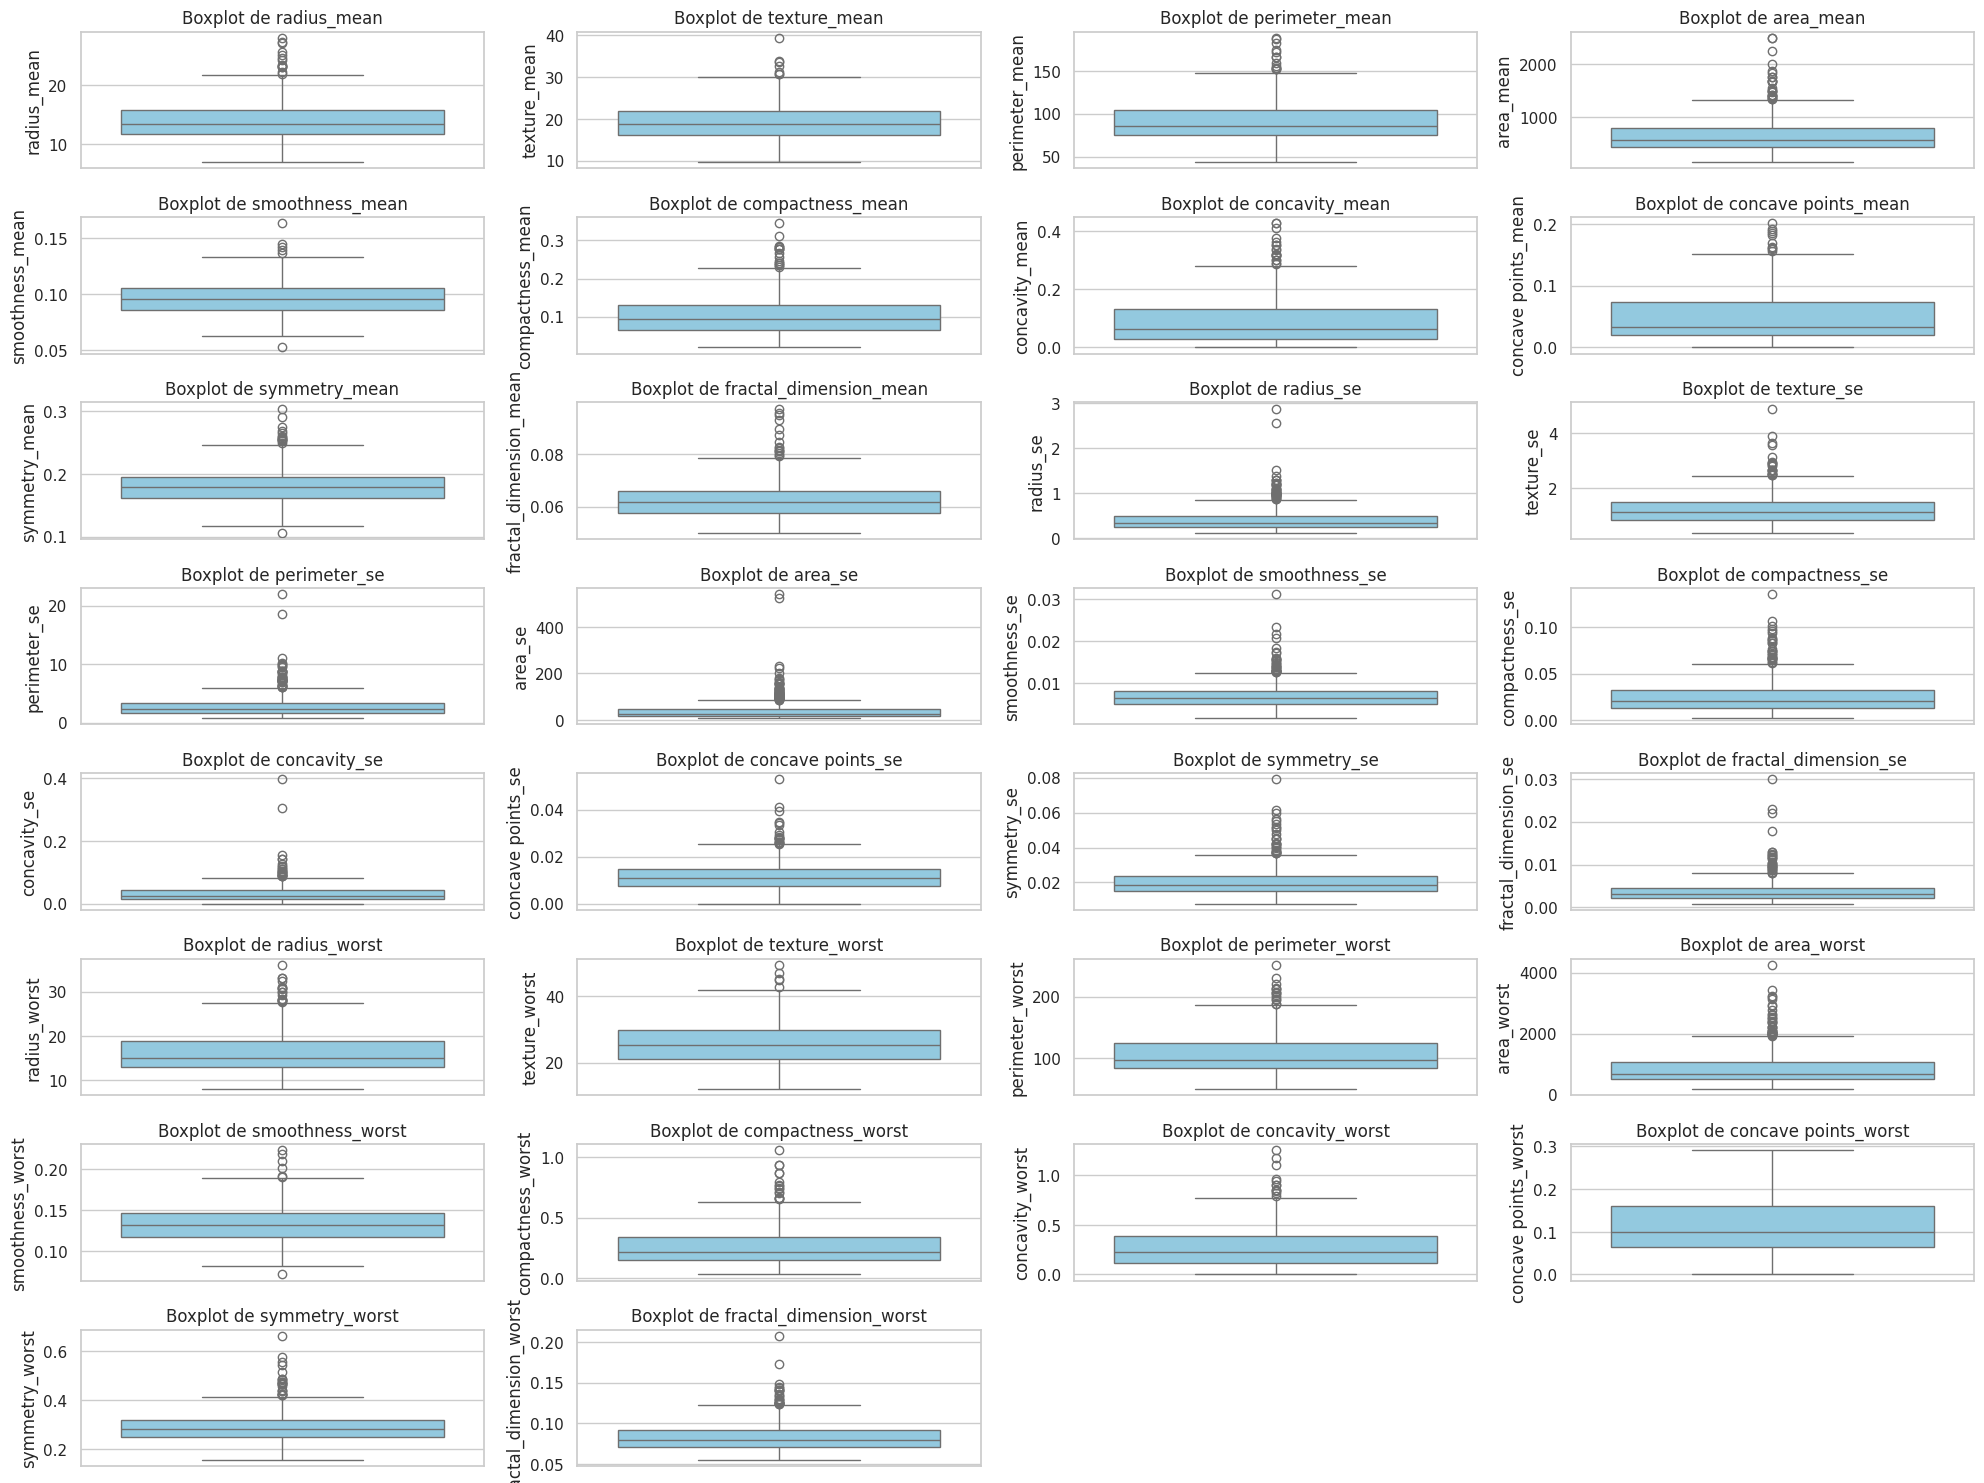

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración del estilo de gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))

# Seleccionar solo las columnas numéricas
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

# Crear gráficos de caja para cada columna numérica
for i, col in enumerate(columnas_numericas, 1):
    plt.subplot((len(columnas_numericas) + 3) // 4, 4, i)  # Ajusta la cuadrícula
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f"Boxplot de {col}")

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [12]:
desc_ceros(df)

,count,mean,std,min,25%,50%,75%,max,%std/mean
concavity_mean,569.0,0.088799,0.079720,0.0,0.029560,0.06154,0.13070,0.42680,89.78
concave points_mean,569.0,0.048919,0.038803,0.0,0.020310,0.03350,0.07400,0.20120,79.32
concavity_se,569.0,0.031894,0.030186,0.0,0.015090,0.02589,0.04205,0.39600,94.65
concave points_se,569.0,0.011796,0.006170,0.0,0.007638,0.01093,0.01471,0.05279,52.31
concavity_worst,569.0,0.272188,0.208624,0.0,0.114500,0.22670,0.38290,1.25200,76.65
concave points_worst,569.0,0.114606,0.065732,0.0,0.064930,0.09993,0.16140,0.29100,57.35


In [13]:
columnas_min_ceros = ['concavity_mean','concave points_mean','concavity_se','concave points_se','concavity_worst','concave points_worst']

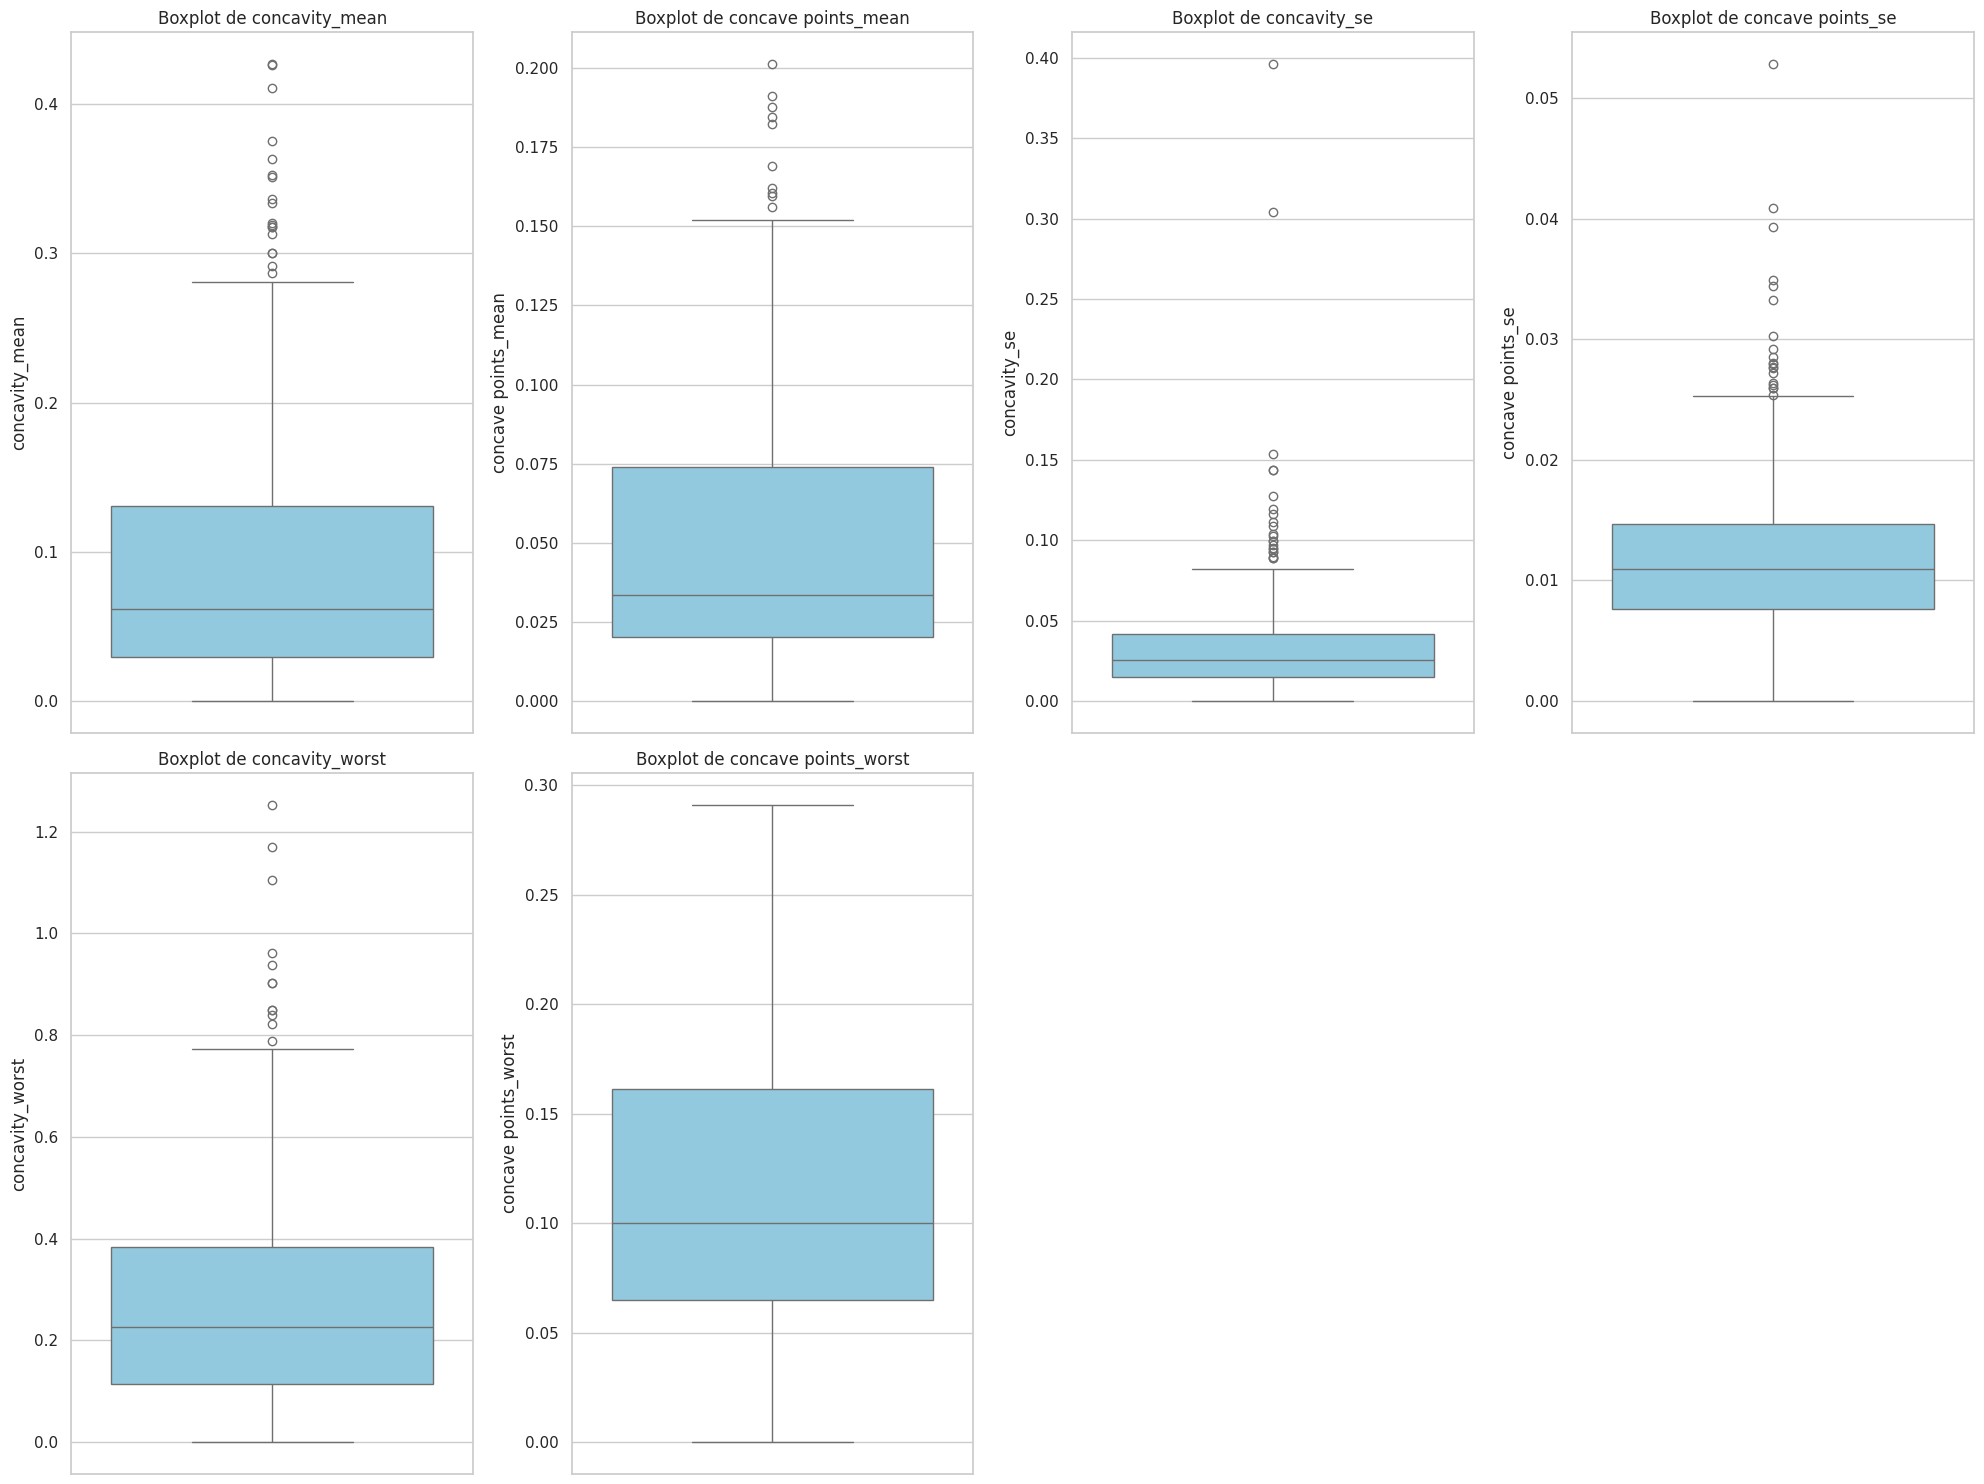

In [14]:
# Configuración del estilo de gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))

# Seleccionar solo las columnas con minimos ceros
# Crear gráficos de caja para cada columna numérica
for i, col in enumerate(columnas_min_ceros, 1):
    plt.subplot((len(columnas_min_ceros) + 3) // 4, 4, i)  # Ajusta la cuadrícula
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f"Boxplot de {col}")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [15]:
# Filtrar las filas donde los valores de las columnas seleccionadas son cero
df_ceros = df[df[columnas_min_ceros].eq(0).all(axis=1)]

# Ver las estadísticas descriptivas de esas filas donde los valores son cero
estadisticas_ceros = df_ceros[columnas_min_ceros].describe()

# Mostrar el resultado
print(estadisticas_ceros.T)

                      count  mean  std  min  25%  50%  75%  max
concavity_mean         13.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
concave points_mean    13.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
concavity_se           13.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
concave points_se      13.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
concavity_worst        13.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
concave points_worst   13.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0


In [16]:
# Filtrar los registros donde la columna 'concavity_mean' es cero
df[df['concavity_mean'] == 0]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
101,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.0,0.0,0.1930,...,7.930,19.54,50.41,185.2,0.15840,0.12020,0.0,0.0,0.2932,0.09382
140,B,9.738,11.97,61.24,288.5,0.09250,0.04102,0.0,0.0,0.1903,...,10.620,14.10,66.53,342.9,0.12340,0.07204,0.0,0.0,0.3105,0.08151
174,B,10.660,15.15,67.49,349.6,0.08792,0.04302,0.0,0.0,0.1928,...,11.540,19.20,73.20,408.3,0.10760,0.06791,0.0,0.0,0.2710,0.06164
175,B,8.671,14.45,54.42,227.2,0.09138,0.04276,0.0,0.0,0.1722,...,9.262,17.04,58.36,259.2,0.11620,0.07057,0.0,0.0,0.2592,0.07848
192,B,9.720,18.22,60.73,288.1,0.06950,0.02344,0.0,0.0,0.1653,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.0,0.0,0.1909,0.06559
314,B,8.597,18.60,54.09,221.2,0.10740,0.05847,0.0,0.0,0.2163,...,8.952,22.44,56.65,240.1,0.13470,0.07767,0.0,0.0,0.3142,0.08116
391,B,8.734,16.84,55.27,234.3,0.10390,0.07428,0.0,0.0,0.1985,...,10.170,22.80,64.01,317.0,0.14600,0.13100,0.0,0.0,0.2445,0.08865
473,B,12.270,29.97,77.42,465.4,0.07699,0.03398,0.0,0.0,0.1701,...,13.450,38.05,85.08,558.9,0.09422,0.05213,0.0,0.0,0.2409,0.06743
538,B,7.729,25.49,47.98,178.8,0.08098,0.04878,0.0,0.0,0.1870,...,9.077,30.92,57.17,248.0,0.12560,0.08340,0.0,0.0,0.3058,0.09938
550,B,10.860,21.48,68.51,360.5,0.07431,0.04227,0.0,0.0,0.1661,...,11.660,24.77,74.08,412.3,0.10010,0.07348,0.0,0.0,0.2458,0.06592


In [17]:
desc(df,'fractal_dimension_worst')

,fractal_dimension_worst
count,569.000000
mean,0.083946
std,0.018061
min,0.055040
25%,0.071460
50%,0.080040
75%,0.092080
max,0.207500
%std/mean,21.520000


<ipython-input-18-13433fcdfd85>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='diagnosis', y='fractal_dimension_worst', palette='Set2')


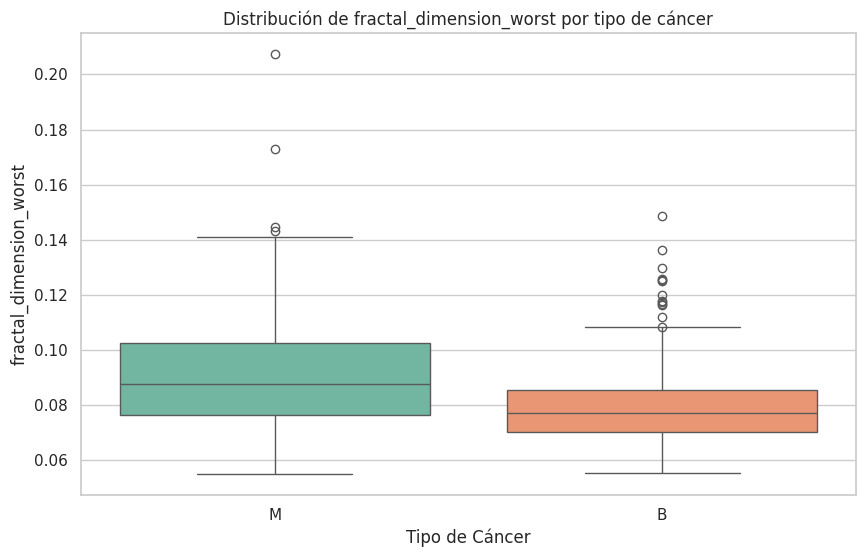

In [18]:
# Asegúrate de que la columna 'diagnosis' contiene las categorías 'B' (Benigno) y 'M' (Maligno)
# Usamos un boxplot para ver la distribución de 'fractal_dimension_worst' por tipo de cáncer

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='diagnosis', y='fractal_dimension_worst', palette='Set2')

# Etiquetas y título
plt.title('Distribución de fractal_dimension_worst por tipo de cáncer')
plt.xlabel('Tipo de Cáncer')
plt.ylabel('fractal_dimension_worst')

# Mostrar el gráfico
plt.show()


              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



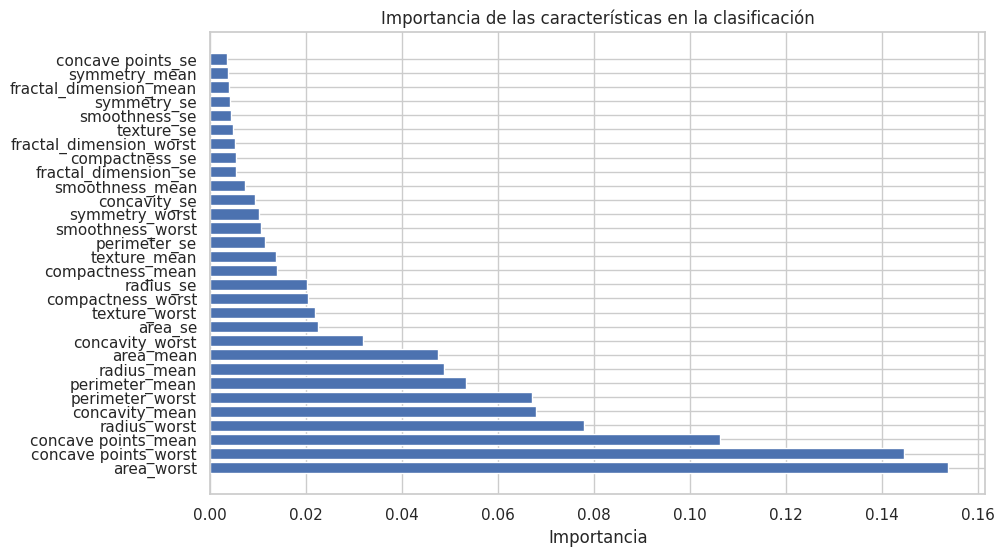

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Separar los datos en variables independientes (X) y la variable objetivo (y)
X = df.drop(columns=['diagnosis'])
y = df['diagnosis'].map({'B': 0, 'M': 1})  # Mapeamos Benigno a 0 y Maligno a 1

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predecir y evaluar el modelo
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Obtener la importancia de las características
importancia = model.feature_importances_

# Crear un dataframe con las características y sus importancias
import pandas as pd
import matplotlib.pyplot as plt

importancia_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importancia
})

# Ordenar por importancia
importancia_df = importancia_df.sort_values(by='Importance', ascending=False)

# Graficar la importancia
plt.figure(figsize=(10, 6))
plt.barh(importancia_df['Feature'], importancia_df['Importance'])
plt.xlabel('Importancia')
plt.title('Importancia de las características en la clasificación')
plt.show()


fractal_dimension_worst no es tan determinante. En el boxplot se ve que el rango  0.05 a 0.15 en Benignos ya se incluyen outliers pero son normales para el Maligno.

2. Exploración y preprocesamiento de datos:
  - Realiza una normalización de los datos para asegurar que todas las características se encuentren en el mismo rango y mejoren el rendimiento de la red neuronal.
  - Divide el dataset en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento y 20% prueba).

In [20]:
desc(df)

,count,mean,std,min,25%,50%,75%,max,%std/mean
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000,24.94
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000,22.30
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000,26.42
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000,53.74
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340,14.60
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540,50.62
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680,89.78
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120,79.32
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400,15.13
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744,11.24


In [21]:
# Seleccionar solo las columnas numéricas
columns_numericas = df.select_dtypes(include=['float64', 'int64']).columns

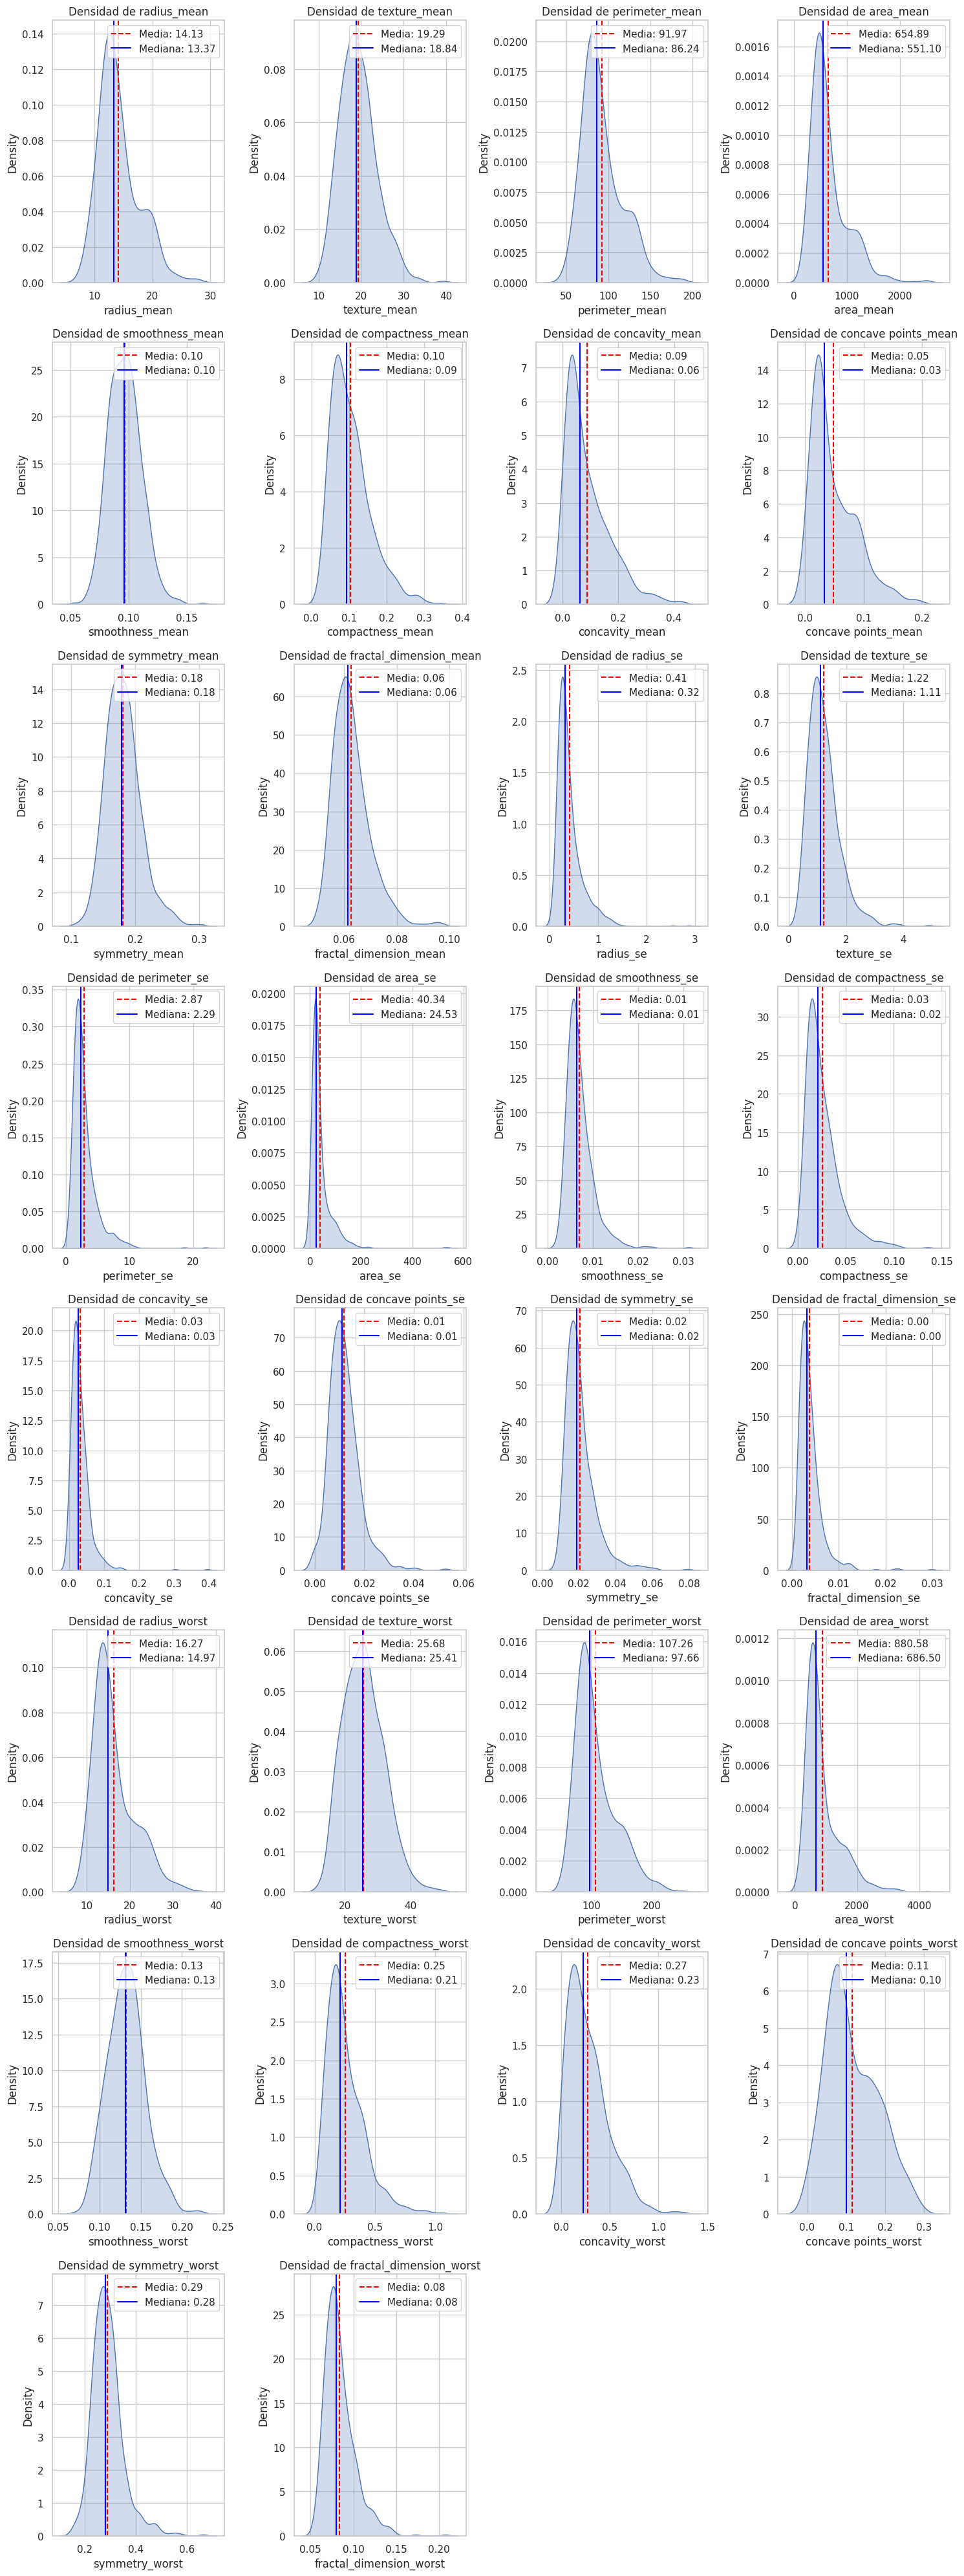

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Ignorar los warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Seleccionar solo las columnas numéricas
columns_numericas = df.select_dtypes(include=['float64', 'int64']).columns

# Determinar el número de subgráficos necesarios
n_cols = 4  # Número de columnas para los subgráficos
n_rows = int(np.ceil(len(columns_numericas) / n_cols))  # Calcular el número de filas necesarias

# Crear el gráfico de densidad para cada columna numérica
plt.figure(figsize=(15, 5 * n_rows))  # Tamaño de la figura ajustado

for i, col in enumerate(columns_numericas, 1):
    # Verificar si la columna contiene valores constantes o NaN
    if df[col].nunique() > 1:  # Si la columna tiene más de un valor único
        plt.subplot(n_rows, n_cols, i)  # Ajuste automático de subgráficos
        sns.kdeplot(df[col], fill=True)  # Gráfico de densidad con fill=True

        # Calcular y trazar la media y la mediana
        media = df[col].mean()
        mediana = df[col].median()

        plt.axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
        plt.axvline(mediana, color='blue', linestyle='-', label=f'Mediana: {mediana:.2f}')

        plt.title(f'Densidad de {col}')  # Título del gráfico
        plt.legend()  # Mostrar la leyenda
    else:
        print(f"La columna {col} tiene solo un valor único y se omitirá en el gráfico.")

plt.tight_layout()  # Ajuste automático para que no se solapen los gráficos
plt.show()


Voy por el Standard Scaler (Z-score).
Hay outliers.
Tien cierto sesgo a la izquierda pero se ven cuasi como una distro normal.

In [24]:
#Voy por el Standard Scaler (Z-score)
from sklearn.preprocessing import StandardScaler

# Seleccionar solo las columnas numéricas (excluyendo 'diagnosis')
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

# Crear el objeto StandardScaler
scaler = StandardScaler()

# Aplicar la estandarización a las columnas numéricas
df[columnas_numericas] = scaler.fit_transform(df[columnas_numericas])

# Ver el DataFrame con las características estandarizadas
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [25]:
# Convertir la columna 'diagnosis' de 'B' y 'M' a 0 y 1
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})


- Divide el dataset en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento y 20% prueba).

In [26]:
from sklearn.model_selection import train_test_split

# Definir la variable dependiente (target) y las características (features)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ahora, dividir el conjunto de entrenamiento en entrenamiento (80%) y validación (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Verificar el tamaño de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de validación: {X_val.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")


Tamaño del conjunto de entrenamiento: 364
Tamaño del conjunto de validación: 91
Tamaño del conjunto de prueba: 114


In [27]:
X.shape[1]

30

# 3. Implementación de la MLP:
- Implementa una red MLP utilizando Keras o cualquier otra biblioteca de deep learning. La red debe tener una capa de entrada que coincida con el número de características del dataset, una capa oculta con al menos 32 neuronas y una capa de salida con una única neurona usando la función de activación sigmoide para la clasificación binaria.
- Utiliza la función de pérdida binaria (binary_crossentropy) y el optimizador Adam.

# 4. Entrenamiento del modelo:
  - Entrena la red en el conjunto de entrenamiento durante al menos 50 épocas. Asegúrate de monitorizar la pérdida y la precisión tanto en el conjunto de entrenamiento como en el conjunto de validación.
  - Visualiza las curvas de aprendizaje que muestran cómo evolucionan la pérdida y la precisión durante el entrenamiento.

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 0.9670 - val_loss: 0.1627
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.9670 - val_loss: 0.1673
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.9670 - val_loss: 0.1704
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 0.9670 - val_loss: 0.1704
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.9670 - val_loss: 0.1720
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.9670 - val_loss: 0.1743
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.9670 - val_loss: 0.1757
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.9670 - val_l

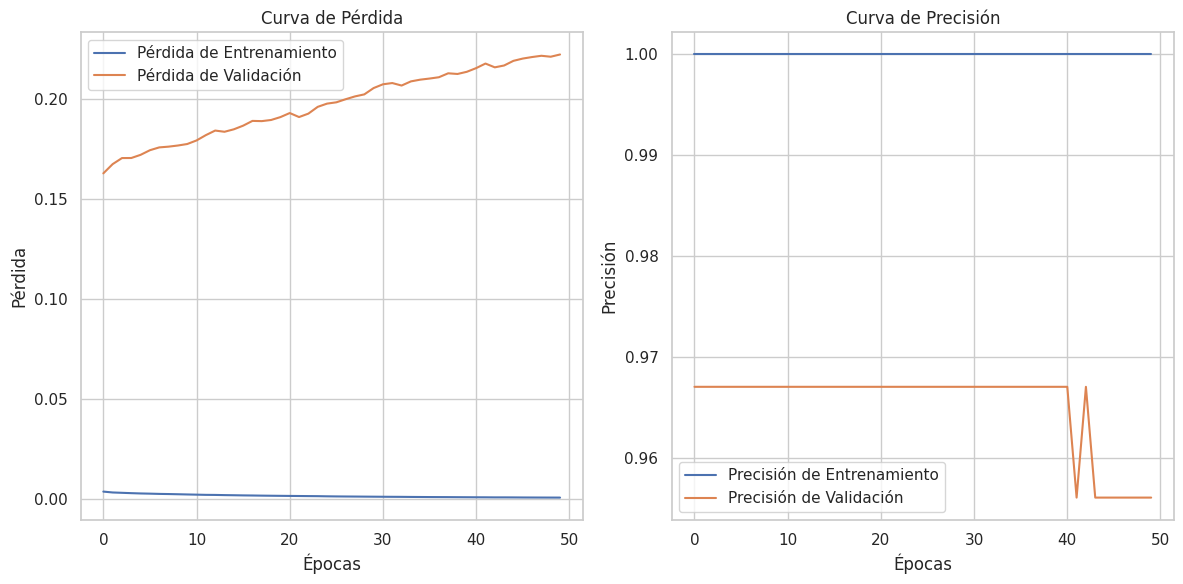

In [30]:
import matplotlib.pyplot as plt  # Esto sirve para dibujar gráficos

# Entrenamos el modelo durante 50 épocas (que es como hacer 50 rondas de práctica)
# Usamos el conjunto de entrenamiento para que el modelo aprenda, y también un conjunto de validación para comprobar si aprende bien
history = model.fit(X_train, y_train,  # X_train son las características, y_train son las respuestas correctas
                    epochs=50,  # Entrenamos por 50 rondas (épocas)
                    batch_size=32,  # Decimos cuántos datos se usan en cada ronda
                    validation_data=(X_val, y_val),  # Validamos el modelo con datos que no ha visto
                    verbose=1)  # Esto muestra información sobre el entrenamiento

# Ahora, vamos a dibujar dos gráficos para ver cómo le fue al modelo mientras entrenaba:
# Primero, vamos a graficar cómo cambia la "pérdida" (lo que el modelo está fallando)

plt.figure(figsize=(12, 6))  # Esto prepara el área para dibujar los gráficos

# Graficamos la "pérdida" de entrenamiento y validación (muestra cuán bien o mal está el modelo)
plt.subplot(1, 2, 1)  # Aquí dividimos el espacio en 2 gráficos y ponemos el primero
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')  # La pérdida en el entrenamiento
plt.plot(history.history['val_loss'], label='Pérdida de Validación')  # La pérdida en los datos de validación
plt.title('Curva de Pérdida')  # El título del gráfico
plt.xlabel('Épocas')  # Etiqueta del eje X (número de rondas de entrenamiento)
plt.ylabel('Pérdida')  # Etiqueta del eje Y (qué tan bien lo hace el modelo)
plt.legend()  # Esto agrega una leyenda para saber qué línea es cada una

# Graficamos la "precisión" (lo bien que el modelo está clasificando correctamente)
plt.subplot(1, 2, 2)  # Aquí ponemos el segundo gráfico
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')  # Precisión en entrenamiento
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')  # Precisión en validación
plt.title('Curva de Precisión')  # Título del gráfico
plt.xlabel('Épocas')  # Etiqueta del eje X
plt.ylabel('Precisión')  # Etiqueta del eje Y
plt.legend()  # Leyenda para este gráfico también

# Finalmente, mostramos los gráficos en la pantalla
plt.tight_layout()  # Esto ajusta los gráficos para que no se monten unos encima de otros
plt.show()  # Muestra los gráficos


En el grafico de Curva de Perdida veo sobreajuste: La perdida en la validación aumente mientras que para el de entrenamiento entra en desapariciion del gradiente.

# Vamos a probar algunos ajustes.

## Parada Temprana

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7319 - loss: 0.5847 - val_accuracy: 0.8791 - val_loss: 0.4560
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8901 - loss: 0.4348 - val_accuracy: 0.9341 - val_loss: 0.3597
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9563 - loss: 0.3364 - val_accuracy: 0.9451 - val_loss: 0.2928
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9604 - loss: 0.2654 - val_accuracy: 0.9451 - val_loss: 0.2454
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9575 - loss: 0.2138 - val_accuracy: 0.9451 - val_loss: 0.2119
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9737 - loss: 0.1753 - val_accuracy: 0.9451 - val_loss: 0.1886
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9790 - loss: 0.1466 - val_accuracy: 0.9451 - val_loss: 0.1722
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9799 - loss: 0.1251 - val_accuracy: 0.9451 - val_loss

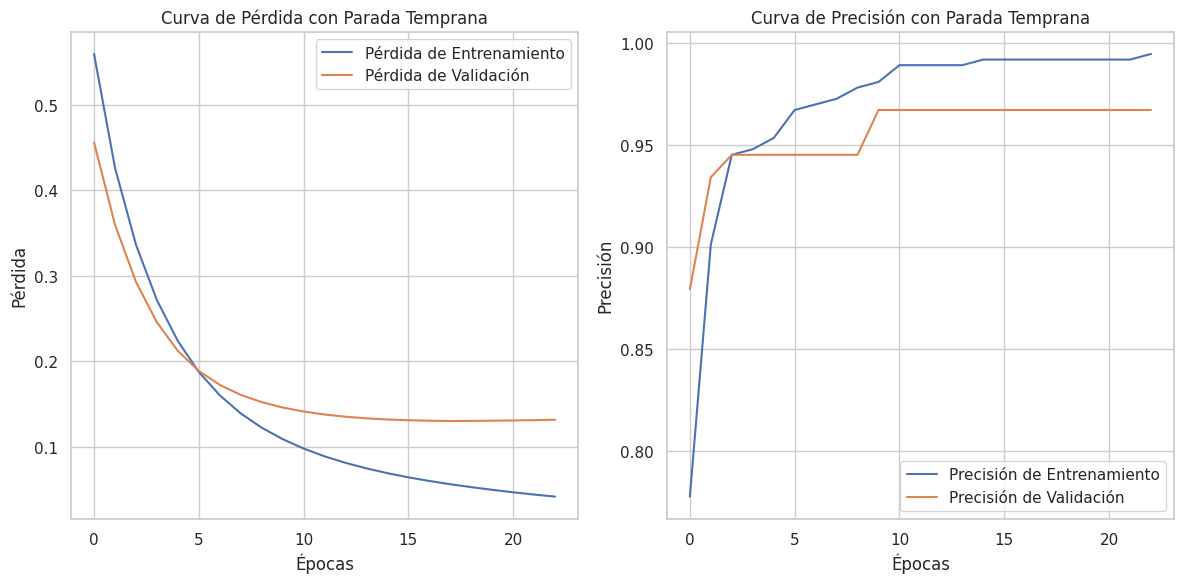

Área entre las curvas de pérdida: 0.7562


In [45]:
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
# Fijar las semillas para la reproducibilidad
#np.random.seed(42)
#random.seed(42)
#tf.random.set_seed(42)
# Redefinir el modelo
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
#model.add(Dropout(0.5))  # Añadimos Dropout para combatir el sobreajuste
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Capa de salida con activación sigmoide

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Configuración de parada temprana
early_stopping = EarlyStopping(
    monitor='val_loss',       # Supervisa la pérdida en validación
    patience=5,               # Si no mejora en 5 épocas, se detiene
    restore_best_weights=True # Recupera los mejores pesos
)

# Entrenamiento del modelo
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping], # Aplicamos la parada temprana
    verbose=1
)

# Ver los resultados
import matplotlib.pyplot as plt

# Graficamos la pérdida
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Curva de Pérdida con Parada Temprana')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Graficamos la precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Curva de Precisión con Parada Temprana')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()
# Obtener las pérdidas del entrenamiento y validación
train_loss = history.history['loss']  # Pérdida en entrenamiento
val_loss = history.history['val_loss']  # Pérdida en validación

# Calcular la diferencia entre las pérdidas
loss_diff = np.array(val_loss) - np.array(train_loss)

# Calcular el área bajo la curva usando integración numérica (trapz)
area_between_curves = np.trapz(loss_diff, dx=1)  # dx=1 porque las épocas están espaciadas uniformemente

print(f"Área entre las curvas de pérdida: {area_between_curves:.4f}")

Wow, mejoro drasticamente la perdida y la precisión

# Parada Temprana con Dropout

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.3717 - loss: 0.8797 - val_accuracy: 0.6703 - val_loss: 0.6565
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5615 - loss: 0.6882 - val_accuracy: 0.8352 - val_loss: 0.5495
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7347 - loss: 0.5383 - val_accuracy: 0.8681 - val_loss: 0.4711
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8578 - loss: 0.4613 - val_accuracy: 0.8791 - val_loss: 0.4093
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8826 - loss: 0.3912 - val_accuracy: 0.8901 - val_loss: 0.3580
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9124 - loss: 0.3435 - val_accuracy: 0.9011 - val_loss: 0.3160
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9374 - loss: 0.2834 - val_accuracy: 0.9011 - val_loss: 0.2809
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9377 - loss: 0.2522 - val_accuracy: 0.9121 - v

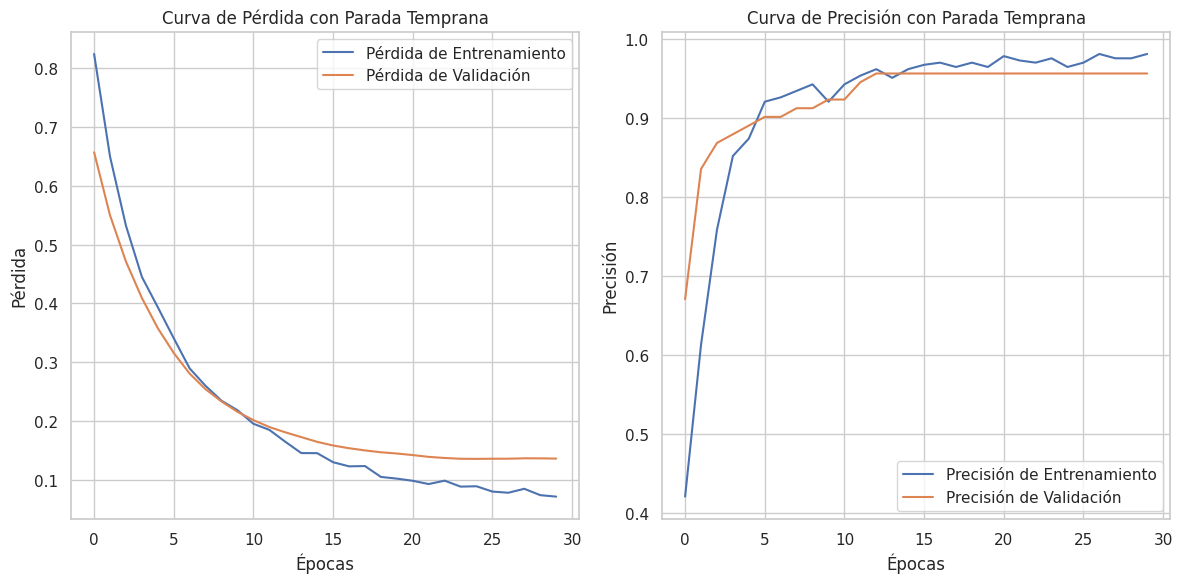

Área entre las curvas de pérdida: 0.3667


In [48]:
#np.random.seed(42)   # Eliminar esta línea
#random.seed(42)      # Eliminar esta línea
#tf.random.set_seed(42) # Eliminar esta línea
#Redefinir el modelo
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Añadimos Dropout para combatir el sobreajuste
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Capa de salida con activación sigmoide

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Configuración de parada temprana
early_stopping = EarlyStopping(
    monitor='val_loss',       # Supervisa la pérdida en validación
    patience=5,               # Si no mejora en 5 épocas, se detiene
    restore_best_weights=True # Recupera los mejores pesos
)

# Entrenamiento del modelo
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping], # Aplicamos la parada temprana
    verbose=1
)

# Ver los resultados
import matplotlib.pyplot as plt

# Graficamos la pérdida
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Curva de Pérdida con Parada Temprana')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Graficamos la precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Curva de Precisión con Parada Temprana')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

# Obtener las pérdidas del entrenamiento y validación
train_loss = history.history['loss']  # Pérdida en entrenamiento
val_loss = history.history['val_loss']  # Pérdida en validación

# Calcular la diferencia entre las pérdidas
loss_diff = np.array(val_loss) - np.array(train_loss)

# Calcular el área bajo la curva usando integración numérica (trapz)
area_between_curves = np.trapz(loss_diff, dx=1)  # dx=1 porque las épocas están espaciadas uniformemente

print(f"Área entre las curvas de pérdida: {area_between_curves:.4f}")

In [28]:
# Ahora creamos nuestra red neuronal
model = Sequential()  # Usamos un modelo secuencial, que es como construir una torre de bloques

# La primera capa es la entrada, tiene el mismo número de "entradas" que el número de características que tenemos
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Esta capa tiene 64 neuronas y usa "ReLU" para activarse

# Ahora agregamos una capa oculta que tiene 32 neuronas, también usa "ReLU" para activarse
model.add(Dense(32, activation='relu'))  # Capa oculta con 32 neuronas

# La última capa es la salida, tiene solo una neurona porque estamos haciendo una clasificación binaria (Sí o No)
model.add(Dense(1, activation='sigmoid'))  # Usamos "sigmoid" para decidir entre dos respuestas posibles

# Ahora preparamos todo para que la red neuronal aprenda:
# Usamos el optimizador "Adam" que ayuda a mejorar el aprendizaje y "binary_crossentropy" porque estamos haciendo una clasificación binaria
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Mostramos el resumen del modelo para ver cómo está estructurado
model.summary()

# Ahora entrenamos el modelo con los datos que hemos preparado (X_train y y_train)
# Durante el entrenamiento, la red neuronal va a aprender a hacer predicciones
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
# "epochs" es cuántas veces pasamos por los datos para aprender, "batch_size" es cuántos ejemplos le damos a la red a la vez

# Después de entrenar, probamos el modelo con los datos que no ha visto antes (X_test y y_test) para ver qué tan bien aprendió
loss, accuracy = model.evaluate(X_test, y_test)  # Aquí evaluamos el modelo
print(f"Accuracy del modelo en el conjunto de prueba: {accuracy*100:.2f}%")  # Mostramos qué tan preciso es el modelo

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4961 - loss: 0.7163 - val_accuracy: 0.9035 - val_loss: 0.4306
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9182 - loss: 0.3590 - val_accuracy: 0.9298 - val_loss: 0.2512
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9508 - loss: 0.2250 - val_accuracy: 0.9561 - val_loss: 0.1681
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9859 - loss: 0.1344 - val_accuracy: 0.9649 - val_loss: 0.1290
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9731 - loss: 0.1269 - val_accuracy: 0.9649 - val_loss: 0.1109
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9767 - loss: 0.0871 - val_accuracy: 0.9649 - val_loss: 0.1021
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9867 - loss: 0.0680 - val_accuracy: 0.9649 - val_loss: 0.0954
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9889 - loss: 0.0623 - val_accuracy: 0.9649 - val_loss

El mejor parámtro para Dropout en este caso es 0.5
Con 0.6 se vuelve negativo.
Con 0.49 ya es mejor: 0.17

Ojo pero los pesos se asignan aleatoriamente y cambian el desempeño.

5. Evaluación del modelo:
  - Evalúa el modelo en el conjunto de prueba utilizando métricas como la precisión, el recall, la F1-score y la matriz de confusión.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Precisión: 0.9535
Recall: 0.9535
F1-Score: 0.9535


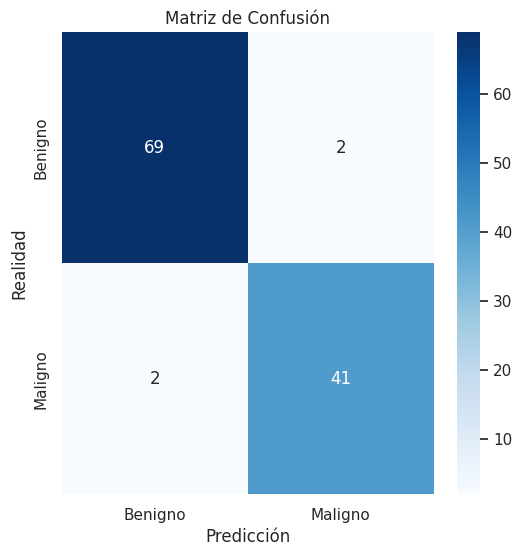

In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
# Hacer las predicciones en el conjunto de prueba
y_pred = model.predict(X_test)  # Las predicciones del modelo en el conjunto de prueba

# Convertir las predicciones continuas a etiquetas binarias (0 o 1)
y_pred_bin = (y_pred > 0.5).astype(int)  # Umbral de 0.5 para convertir a binario

# Calcular las métricas
precision = precision_score(y_test, y_pred_bin)  # Precisión
recall = recall_score(y_test, y_pred_bin)  # Recall
f1 = f1_score(y_test, y_pred_bin)  # F1-Score

# Mostrar las métricas
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_bin)

# Graficar la matriz de confusión
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()


- Discute si la red MLP básica es adecuada para este tipo de datos y cómo podría mejorarse.

### ¿Es adecuada una **Red Neuronal Perceptrón Multicapa (MLP)** básica para este tipo de datos?

Las **redes neuronales perceptrón multicapa (MLP)** son un modelo de **aprendizaje supervisado** que consta de una o más capas ocultas entre la capa de entrada y la capa de salida. Este tipo de red es adecuado para una **clasificación binaria**, como en tu caso, donde se busca clasificar entre "benigno" o "maligno".

#### Ventajas de una MLP básica:
1. **Modelo generalista**: Una MLP es flexible y puede capturar relaciones no lineales entre las características de entrada y las clases de salida.
2. **Facilidad de implementación**: Implementar un MLP básico es relativamente sencillo y, si se ajusta bien a los datos, puede lograr buenos resultados.
3. **Aplicación a datos tabulares**: Las redes MLP funcionan bien con datos tabulares, como en tu caso (benigno vs maligno).

#### Desventajas de una MLP básica:
1. **Sobrecarga computacional**: Si el modelo es demasiado grande (con muchas capas o neuronas), puede volverse computacionalmente costoso y susceptible al sobreajuste.
2. **Sobreajuste**: Si la red no tiene suficientes datos o la arquitectura no está bien regularizada, el modelo puede sobreajustarse a los datos de entrenamiento y no generalizar bien a nuevos datos.
3. **Dependencia de la preparación de los datos**: Las redes MLP requieren una buena preparación de los datos (normalización, eliminación de valores atípicos, etc.) para obtener buenos resultados.

### ¿Cómo podría mejorarse el modelo?

A continuación te ofrezco algunas sugerencias para mejorar el rendimiento de tu modelo MLP en clasificación binaria:

#### 1. **Regularización**:
   - **Dropout**: Ya has probado **dropout**, lo cual es útil para evitar el sobreajuste. Considera ajustar el valor de **dropout** o probar diferentes valores para encontrar el que mejor se adapte a tu conjunto de datos.
   - **Regularización L1/L2**: Agregar **regularización L1 o L2** en las capas ocultas puede ayudar a prevenir el sobreajuste al penalizar grandes pesos.
   - **Parada temprana**: Ya estás utilizando **parada temprana** (`EarlyStopping`), que es una excelente práctica para evitar que el modelo entrene demasiado y empiece a sobreajustarse.

#### 2. **Optimización**:
   - **Tasa de aprendizaje**: La tasa de aprendizaje juega un papel crucial en el entrenamiento. Una **tasa de aprendizaje adaptativa**, como **Adam**, es una excelente opción, pero puedes ajustar su tasa de aprendizaje (`learning_rate`) o usar estrategias como el **decaimiento de la tasa de aprendizaje**.
   - **Batch normalization**: Esta técnica normaliza las entradas de cada capa para mejorar la convergencia del entrenamiento, lo que puede ayudar a acelerar el proceso y mejorar los resultados.

#### 3. **Arquitectura del modelo**:
   - **Capas ocultas**: Si tu modelo tiene solo una o dos capas ocultas, puede ser útil probar con más capas o más neuronas por capa para aumentar su capacidad de aprender representaciones más complejas. Sin embargo, esto también aumenta el riesgo de sobreajuste, por lo que es importante regularizar adecuadamente.
   - **Número de neuronas**: Ajustar el número de neuronas en cada capa también es crucial. Si el número es demasiado bajo, el modelo podría no ser lo suficientemente complejo para capturar las relaciones no lineales, pero si es demasiado alto, puede sobreajustarse.

#### 4. **Mejorar la preparación de los datos**:
   - **Normalización/Estandarización**: Asegúrate de que tus datos estén **normalizados o estandarizados** adecuadamente, especialmente si tienen diferentes escalas. Esto es importante para que todas las características contribuyan de manera similar durante el entrenamiento de la red neuronal.
   - **Manejo de clases desbalanceadas**: Si las clases están desbalanceadas (por ejemplo, mucho más benignos que malignos o viceversa), podrías intentar técnicas como **sobremuestreo**, **submuestreo** o **pesos de clase ajustados** para que el modelo preste más atención a las clases menos representadas.

#### 5. **Evaluación y ajuste del modelo**:
   - **Métricas adicionales**: Además de la **precisión**, también debes evaluar el modelo con métricas como el **recall**, **precision** y **F1-score**, especialmente si las clases están desbalanceadas. La **curva ROC** y el **área bajo la curva (AUC)** también son útiles para evaluar el rendimiento.
   - **Validación cruzada**: Utilizar **validación cruzada** (por ejemplo, **k-fold cross-validation**) puede proporcionarte una evaluación más robusta del rendimiento del modelo y reducir la variabilidad en las métricas.

#### 6. **Ensamblaje de modelos**:
   - Si el modelo MLP no es suficiente, podrías combinar varias redes neuronales entrenadas con diferentes inicializaciones o utilizar otros algoritmos de clasificación como **Random Forest** o **XGBoost** y combinar sus predicciones (ensamblaje).

#### 7. **Hiperparámetros**:
   - La selección de los **hiperparámetros** (número de capas, neuronas por capa, tasa de aprendizaje, dropout, etc.) puede mejorar significativamente el rendimiento del modelo. Puedes usar técnicas como **búsqueda aleatoria** o **búsqueda en cuadrícula** para encontrar los mejores valores para tus hiperparámetros.

### Conclusión:
- Una **MLP básica** es un punto de partida razonable para la clasificación binaria, pero puede ser mejorada con técnicas de **regularización**, **optimización**, y **ajustes arquitectónicos**.
- Si el conjunto de datos es pequeño, o si el modelo tiende a sobreajustarse, sería una buena idea probar con **modelos más simples** o **más técnicas de regularización** para mejorar la generalización.
- Siempre es importante evaluar el modelo con múltiples **métricas** y realizar un ajuste fino de los **hiperparámetros** para maximizar el rendimiento.
